In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../dataset/pima-indians-diabetes.csv',# csv 파일중 원하는 column만 불러옴
                names = ["pregnant","plasma","pressure","thickness","insulin","BMI","pedigree","age","class"])

In [2]:
df.head()
# 1. 과거 임신 횟수
# 2. 포도당 부하 검사 2시간 경과 후 공복혈당 농도
# 3. 확장기 혈압
# 4. 상두근 피부 주름 무게
# 5. 혈청 인슐린
# 6. BMI 체질량 지수
# 7. 당뇨병 가족력
# 8. 나이
# 9. 정답, 즉 1: 당뇨, 0 : 정상

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df[['plasma','class']]

,plasma,class
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


In [6]:
df.loc[5:12,['plasma','class','insulin','BMI']]

,plasma,class,insulin,BMI
5,116,0,0,25.6
6,78,1,88,31.0
7,115,0,0,35.3
8,197,1,543,30.5
9,125,1,0,0.0
10,110,0,0,37.6
11,168,1,0,38.0
12,139,0,0,27.1


           pregnant    plasma  pressure  thickness   insulin       BMI  \
pregnant   1.000000  0.129459  0.141282  -0.081672 -0.073535  0.017683   
plasma     0.129459  1.000000  0.152590   0.057328  0.331357  0.221071   
pressure   0.141282  0.152590  1.000000   0.207371  0.088933  0.281805   
thickness -0.081672  0.057328  0.207371   1.000000  0.436783  0.392573   
insulin   -0.073535  0.331357  0.088933   0.436783  1.000000  0.197859   
BMI        0.017683  0.221071  0.281805   0.392573  0.197859  1.000000   
pedigree  -0.033523  0.137337  0.041265   0.183928  0.185071  0.140647   
age        0.544341  0.263514  0.239528  -0.113970 -0.042163  0.036242   
class      0.221898  0.466581  0.065068   0.074752  0.130548  0.292695   

           pedigree       age     class  
pregnant  -0.033523  0.544341  0.221898  
plasma     0.137337  0.263514  0.466581  
pressure   0.041265  0.239528  0.065068  
thickness  0.183928 -0.113970  0.074752  
insulin    0.185071 -0.042163  0.130548  
BMI    

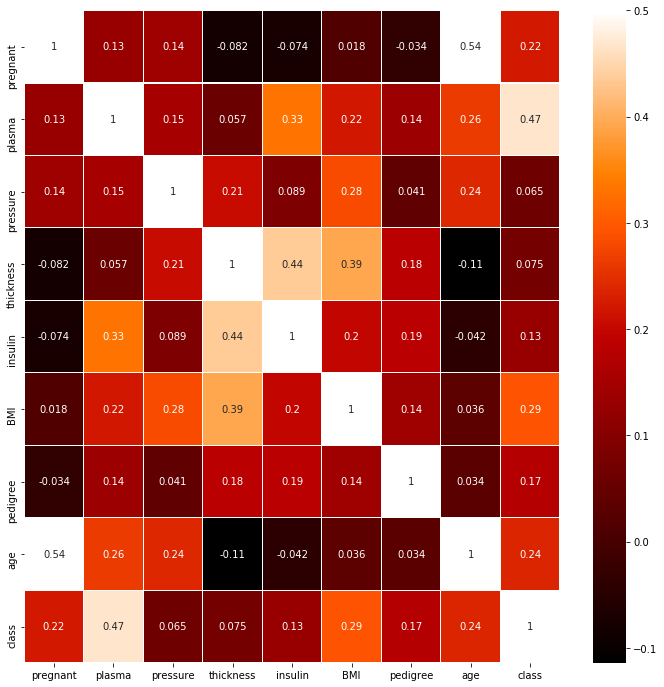

In [7]:
colormap = plt.cm.gist_heat # 그래프 색상구성
plt.figure(figsize=(12,12)) # 그래프 크기 지정

print(df.corr()) # 각 열별 상관관계 값
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=colormap,linecolor='white',annot=True)
plt.show()

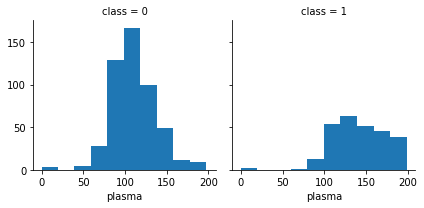

In [8]:
grid = sns.FacetGrid(df, col='class') # 당뇨병 여부에 따른 구분
grid.map(plt.hist,'plasma',bins=10)# 공복혈당과 당뇨병 여부에 따른 histogram
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf

np.random.seed(3) # 0~1 사이 난수 3개 생성
tf.random.set_seed(3)

dataset = np.loadtxt("../dataset/pima-indians-diabetes.csv",delimiter=",")
X = dataset[:,0:8] # 열의 인덱스가 0~8인 값 추출
Y = dataset[:,8] # 열의 인덱스가 8인 값 추출

model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))# units =12, 활성화 함수 ='relu'
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,Y, epochs=200, batch_size=10)# 모델 최적화

print("\n Accuracy : %.4f" % (model.evaluate(X,Y)[1]))#? 뭐지

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 1s 904us/sample - loss: 10.9665 - accuracy: 0.6224
Epoch 2/200
768/768 [==============================] - 0s 173us/sample - loss: 5.9693 - accuracy: 0.6107
Epoch 3/200
768/768 [==============================] - 0s 187us/sample - loss: 3.3368 - accuracy: 0.5208
Epoch 4/200
768/768 [==============================] - 0s 192us/sample - loss: 1.9847 - accuracy: 0.5169
Epoch 5/200
768/768 [==============================] - 0s 199us/sample - loss: 1.1698 - accuracy: 0.5391
Epoch 6/200
768/768 [==============================] - 0s 171us/sample - loss: 0.8547 - accuracy: 0.5482
Epoch 7/200
768/768 [==============================] - 0s 182us/sample - loss: 0.7792 - accuracy: 0.5521
Epoch 8/200
768/768 [==============================] - 0s 184us/sample - loss: 0.7455 - accuracy: 0.5638
Epoch 9/200
768/768 [==============================] - 0s 213us/sample - loss: 0.7130 - accuracy: 0.6536
Epoch 10/200
768/768 [===========

768/768 [==============================] - 0s 238us/sample - loss: 0.5057 - accuracy: 0.7578
Epoch 79/200
768/768 [==============================] - 0s 240us/sample - loss: 0.5132 - accuracy: 0.7383 - loss: 0.5175 - accuracy: 
Epoch 80/200
768/768 [==============================] - 0s 248us/sample - loss: 0.5019 - accuracy: 0.7409
Epoch 81/200
768/768 [==============================] - 0s 230us/sample - loss: 0.5046 - accuracy: 0.7487
Epoch 82/200
768/768 [==============================] - 0s 182us/sample - loss: 0.5115 - accuracy: 0.7357
Epoch 83/200
768/768 [==============================] - 0s 162us/sample - loss: 0.5022 - accuracy: 0.7539
Epoch 84/200
768/768 [==============================] - 0s 174us/sample - loss: 0.5021 - accuracy: 0.7422
Epoch 85/200
768/768 [==============================] - 0s 187us/sample - loss: 0.5007 - accuracy: 0.7500
Epoch 86/200
768/768 [==============================] - 0s 178us/sample - loss: 0.5081 - accuracy: 0.7474
Epoch 87/200
768/768 [=========

768/768 [==============================] - 0s 182us/sample - loss: 0.4695 - accuracy: 0.7747
Epoch 155/200
768/768 [==============================] - 0s 177us/sample - loss: 0.4694 - accuracy: 0.7643
Epoch 156/200
768/768 [==============================] - 0s 184us/sample - loss: 0.4677 - accuracy: 0.7721
Epoch 157/200
768/768 [==============================] - 0s 205us/sample - loss: 0.4732 - accuracy: 0.7786
Epoch 158/200
768/768 [==============================] - 0s 169us/sample - loss: 0.4621 - accuracy: 0.7786
Epoch 159/200
768/768 [==============================] - 0s 188us/sample - loss: 0.4675 - accuracy: 0.7747
Epoch 160/200
768/768 [==============================] - 0s 186us/sample - loss: 0.4629 - accuracy: 0.7799
Epoch 161/200
768/768 [==============================] - 0s 188us/sample - loss: 0.4701 - accuracy: 0.7682
Epoch 162/200
768/768 [==============================] - 0s 179us/sample - loss: 0.4778 - accuracy: 0.7708
Epoch 163/200
768/768 [============================